In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(style = "ticks", rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
import matplotlib.pyplot as plt
import TeamsMining
import GraficosPlot
from IPython.display import display
from pathlib import Path


In [2]:
df_br_full = pd.read_csv("Brasileirao_Dataset-master/campeonato-brasileiro-full.csv")
df_est_full = pd.read_csv("Brasileirao_Dataset-master/campeonato-brasileiro-estatisticas-full.csv")

In [3]:
df_br_full.head()

,ID,rodada,data,hora,dia,mandante,visitante,formacao_mandante,formacao_visitante,tecnico_mandante,tecnico_visitante,vencedor,arena,mandante_placar,visitante_placar,mandante_estado,visitante_estado,estado_vencedor
0,1,1,2003-03-29,16:00,Sabado,Guarani,Vasco,NaN,NaN,NaN,NaN,Guarani,brinco de ouro,4,2,SP,RJ,SP
1,2,1,2003-03-29,16:00,Sabado,Athletico-PR,Gremio,NaN,NaN,NaN,NaN,Athletico-PR,arena da baixada,2,0,PR,RS,PR
2,3,1,2003-03-30,16:00,Domingo,Flamengo,Coritiba,NaN,NaN,NaN,NaN,-,maracana,1,1,RJ,PR,-
3,4,1,2003-03-30,16:00,Domingo,Goias,Paysandu,NaN,NaN,NaN,NaN,-,serra dourada,2,2,GO,PA,-
4,5,1,2003-03-30,16:00,Domingo,Internacional,Ponte Preta,NaN,NaN,NaN,NaN,-,beira rio,1,1,RS,SP,-


In [4]:
df_br_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7645 entries, 0 to 7644
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  7645 non-null   int64 
 1   rodada              7645 non-null   int64 
 2   data                7645 non-null   object
 3   hora                7645 non-null   object
 4   dia                 7645 non-null   object
 5   mandante            7645 non-null   object
 6   visitante           7645 non-null   object
 7   formacao_mandante   2671 non-null   object
 8   formacao_visitante  2671 non-null   object
 9   tecnico_mandante    3035 non-null   object
 10  tecnico_visitante   3035 non-null   object
 11  vencedor            7645 non-null   object
 12  arena               7645 non-null   object
 13  mandante_placar     7645 non-null   int64 
 14  visitante_placar    7645 non-null   int64 
 15  mandante_estado     7645 non-null   object
 16  visitante_estado    7645

In [5]:
df_br_full = df_br_full.drop(["formacao_mandante", "formacao_visitante", "tecnico_mandante", "tecnico_visitante"], axis=1)
df_br_full.head()

,ID,rodada,data,hora,dia,mandante,visitante,vencedor,arena,mandante_placar,visitante_placar,mandante_estado,visitante_estado,estado_vencedor
0,1,1,2003-03-29,16:00,Sabado,Guarani,Vasco,Guarani,brinco de ouro,4,2,SP,RJ,SP
1,2,1,2003-03-29,16:00,Sabado,Athletico-PR,Gremio,Athletico-PR,arena da baixada,2,0,PR,RS,PR
2,3,1,2003-03-30,16:00,Domingo,Flamengo,Coritiba,-,maracana,1,1,RJ,PR,-
3,4,1,2003-03-30,16:00,Domingo,Goias,Paysandu,-,serra dourada,2,2,GO,PA,-
4,5,1,2003-03-30,16:00,Domingo,Internacional,Ponte Preta,-,beira rio,1,1,RS,SP,-


In [6]:
df_br_full = df_br_full.drop(["mandante_estado", "visitante_estado", "estado_vencedor", "arena"], axis=1)
df_br_full.head()

,ID,rodada,data,hora,dia,mandante,visitante,vencedor,mandante_placar,visitante_placar
0,1,1,2003-03-29,16:00,Sabado,Guarani,Vasco,Guarani,4,2
1,2,1,2003-03-29,16:00,Sabado,Athletico-PR,Gremio,Athletico-PR,2,0
2,3,1,2003-03-30,16:00,Domingo,Flamengo,Coritiba,-,1,1
3,4,1,2003-03-30,16:00,Domingo,Goias,Paysandu,-,2,2
4,5,1,2003-03-30,16:00,Domingo,Internacional,Ponte Preta,-,1,1


In [7]:
cond = [
    (df_br_full["mandante_placar"] > df_br_full["visitante_placar"]) & (df_br_full["mandante_placar"] != df_br_full["visitante_placar"]),
    (df_br_full["mandante_placar"] < df_br_full["visitante_placar"]) & (df_br_full["mandante_placar"] != df_br_full["visitante_placar"])]

df_br_full["ponto_mandante"] = np.select(cond, [3,0], default=1)
df_br_full["ponto_visitante"] = np.select(cond, [0,3], default=1)

df_br_full.head(20)

,ID,rodada,data,hora,dia,mandante,visitante,vencedor,mandante_placar,visitante_placar,ponto_mandante,ponto_visitante
0,1,1,2003-03-29,16:00,Sabado,Guarani,Vasco,Guarani,4,2,3,0
1,2,1,2003-03-29,16:00,Sabado,Athletico-PR,Gremio,Athletico-PR,2,0,3,0
2,3,1,2003-03-30,16:00,Domingo,Flamengo,Coritiba,-,1,1,1,1
3,4,1,2003-03-30,16:00,Domingo,Goias,Paysandu,-,2,2,1,1
4,5,1,2003-03-30,16:00,Domingo,Internacional,Ponte Preta,-,1,1,1,1
5,6,1,2003-03-30,16:00,Domingo,Criciuma,Fluminense,Criciuma,2,0,3,0
6,7,1,2003-03-30,16:00,Domingo,Juventude,Sao Paulo,-,2,2,1,1
7,8,1,2003-03-30,16:00,Domingo,Fortaleza,Bahia,-,0,0,1,1
8,9,1,2003-03-30,16:00,Domingo,Cruzeiro,Sao Caetano,-,2,2,1,1
9,10,1,2003-03-30,16:00,Domingo,Vitoria,Figueirense,-,1,1,1,1


In [8]:
df_br_full = df_br_full.set_index("ID")
df_br_full.head()

,rodada,data,hora,dia,mandante,visitante,vencedor,mandante_placar,visitante_placar,ponto_mandante,ponto_visitante
ID,,,,,,,,,,,
1,1,2003-03-29,16:00,Sabado,Guarani,Vasco,Guarani,4,2,3,0
2,1,2003-03-29,16:00,Sabado,Athletico-PR,Gremio,Athletico-PR,2,0,3,0
3,1,2003-03-30,16:00,Domingo,Flamengo,Coritiba,-,1,1,1,1
4,1,2003-03-30,16:00,Domingo,Goias,Paysandu,-,2,2,1,1
5,1,2003-03-30,16:00,Domingo,Internacional,Ponte Preta,-,1,1,1,1


In [9]:
total_pontos_mandante_df = df_br_full.groupby(["mandante"]).ponto_mandante.sum().reset_index().sort_values("ponto_mandante", ascending=False).reset_index(drop=True)
total_pontos_mandante_df.index += 1
display(total_pontos_mandante_df)


,mandante,ponto_mandante
1,Santos,742
2,Sao Paulo,741
3,Flamengo,705
4,Internacional,704
5,Gremio,695
6,Athletico-PR,688
7,Corinthians,674
8,Atletico-MG,672
9,Fluminense,644
10,Cruzeiro,631


In [10]:
total_pontos_visitante_df = df_br_full.groupby(["visitante"]).ponto_visitante.sum().reset_index().sort_values("ponto_visitante", ascending=False).reset_index(drop=True)
total_pontos_visitante_df.index += 1
display(total_pontos_visitante_df)

,visitante,ponto_visitante
1,Sao Paulo,476
2,Flamengo,450
3,Corinthians,418
4,Fluminense,409
5,Santos,405
6,Cruzeiro,399
7,Palmeiras,398
8,Internacional,387
9,Atletico-MG,384
10,Gremio,370


In [11]:
df_br_full["data"] = pd.to_datetime(df_br_full["data"])
df_br_full["ano"] = df_br_full["data"].dt.year
df_br_full["ano"] = df_br_full["ano"].astype("int64")

df_dec = df_br_full[df_br_full["ano"] >= 2012]
df_dec.head()

,rodada,data,hora,dia,mandante,visitante,vencedor,mandante_placar,visitante_placar,ponto_mandante,ponto_visitante,ano
ID,,,,,,,,,,,,
3847,1,2012-05-19,18:30,Sabado,Palmeiras,Portuguesa,-,1,1,1,1,2012
3848,1,2012-05-19,18:30,Sabado,Sport,Flamengo,-,1,1,1,1,2012
3849,1,2012-05-19,21:00,Sabado,Figueirense,Nautico,Figueirense,2,1,3,0,2012
3850,1,2012-05-20,16:00,Domingo,Corinthians,Fluminense,Fluminense,0,1,0,3,2012
3851,1,2012-05-20,16:00,Domingo,Internacional,Coritiba,Internacional,2,0,3,0,2012


In [12]:
ano_mandante_plot = df_dec.groupby(["mandante", "ano"]).ponto_mandante.sum().reset_index()
ano_mandante_plot = ano_mandante_plot.rename(columns = {"mandante": "Time"})
display(ano_mandante_plot)

,Time,ano,ponto_mandante
0,America-MG,2016,24
1,America-MG,2018,31
2,America-MG,2021,33
3,Athletico-PR,2013,44
4,Athletico-PR,2014,35
...,...,...,...
199,Vitoria,2013,39
200,Vitoria,2014,23
201,Vitoria,2016,28
202,Vitoria,2017,14


In [13]:
ano_visitante_plot = df_dec.groupby(["visitante", "ano"]).ponto_visitante.sum().reset_index()
ano_visitante_plot = ano_visitante_plot.rename(columns = {"visitante": "Time"})
display(ano_visitante_plot)

,Time,ano,ponto_visitante
0,America-MG,2016,4
1,America-MG,2018,9
2,America-MG,2021,20
3,Athletico-PR,2013,20
4,Athletico-PR,2014,19
...,...,...,...
199,Vitoria,2013,20
200,Vitoria,2014,15
201,Vitoria,2016,17
202,Vitoria,2017,29


In [14]:
ano_time_plot = pd.merge(ano_mandante_plot, ano_visitante_plot, on = ["Time", "ano"])
display(ano_time_plot)

,Time,ano,ponto_mandante,ponto_visitante
0,America-MG,2016,24,4
1,America-MG,2018,31,9
2,America-MG,2021,33,20
3,Athletico-PR,2013,44,20
4,Athletico-PR,2014,35,19
...,...,...,...,...
199,Vitoria,2013,39,20
200,Vitoria,2014,23,15
201,Vitoria,2016,28,17
202,Vitoria,2017,14,29


In [15]:
lista_times = ['Athletico-PR', 'Atletico-MG', 'Botafogo-RJ', 'Corinthians', 'Coritiba', 'Cruzeiro', 'Flamengo', 'Fluminense',
                'Gremio', 'Internacional', 'Palmeiras', 'Santos', 'Sao Paulo', 'Sport', 'Vasco']

In [16]:
ano_time_plot = ano_time_plot.drop(ano_time_plot[~ano_time_plot.Time.isin(lista_times)].index)

display(ano_time_plot)

,Time,ano,ponto_mandante,ponto_visitante
3,Athletico-PR,2013,44,20
4,Athletico-PR,2014,35,19
5,Athletico-PR,2015,33,18
6,Athletico-PR,2016,48,9
7,Athletico-PR,2017,29,22
...,...,...,...,...
194,Vasco,2017,31,25
195,Vasco,2018,32,11
196,Vasco,2019,27,22
197,Vasco,2020,16,12


In [17]:
# MV = TeamsMining.MV(lista_times)
# market_value = TeamsMining.MV_completo(lista_times)

In [18]:
# MV.to_csv("ScrapingBR/MV.csv", index = False)
# market_value.to_csv("ScrapingBR/MV_completo.csv", index = False)

In [19]:
market_value = pd.read_csv("ScrapingBR/MV_completo.csv").drop("Unnamed: 0", axis = 1)
display(market_value)

,Time,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Flamengo,33.700,33.10,72.700,65.000,73.950,86.360,118.500,152.450,176.600,155.700
1,Palmeiras,49.150,38.10,85.600,77.100,78.000,92.425,138.850,104.550,178.125,160.350
2,Gremio,70.550,50.00,58.225,65.675,60.200,80.230,90.750,106.600,124.300,67.500
3,Sao Paulo,82.085,89.10,112.050,92.675,92.280,78.000,97.000,77.125,89.950,88.300
4,Corinthians,73.850,61.90,80.900,66.550,50.250,86.475,89.200,94.800,85.150,87.400
5,Internacional,69.150,32.60,83.000,75.775,60.400,55.850,68.950,59.900,133.200,86.950
6,Santos,83.100,55.60,58.000,57.650,68.050,71.300,67.090,54.850,88.550,80.500
7,Atletico-MG,51.100,64.55,72.850,78.750,71.975,59.500,58.900,80.225,93.650,117.050
8,Fluminense,86.100,47.90,97.100,70.100,40.400,37.725,68.100,89.725,124.225,68.750
9,Vasco,26.750,16.25,64.400,26.825,59.550,63.450,47.150,42.050,36.300,23.000


In [20]:
market_value.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    15 non-null     object 
 1   2012    15 non-null     float64
 2   2013    15 non-null     float64
 3   2014    15 non-null     float64
 4   2015    15 non-null     float64
 5   2016    15 non-null     float64
 6   2017    15 non-null     float64
 7   2018    15 non-null     float64
 8   2019    15 non-null     float64
 9   2020    15 non-null     float64
 10  2021    15 non-null     float64
dtypes: float64(10), object(1)
memory usage: 1.4+ KB


In [21]:
teste = market_value.__deepcopy__()

In [22]:
sum2012 = teste["2012"].sum()
sum2021 = teste["2021"].sum()
print(sum2012)
print(sum2021)
factor = sum2012 / sum2021
for i in range (2013, 2022):
    teste[f"{i}"] *= factor

display(teste)

766.385
1135.3250000000003


,Time,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Flamengo,33.700,22.343684,49.075101,43.877326,49.918896,58.296090,79.991740,102.909205,119.211319,105.103071
1,Palmeiras,49.150,25.718863,57.783063,52.045259,52.652791,62.390182,93.728718,70.574991,120.240749,108.241988
2,Gremio,70.550,33.751789,39.303958,44.332975,40.637154,54.158121,61.259497,71.958814,83.906948,45.564915
3,Sao Paulo,82.085,60.145688,75.637759,62.558941,62.292302,52.652791,65.478471,52.062135,60.719469,59.605660
4,Corinthians,73.850,41.784715,54.610395,44.923631,33.920548,58.373719,60.213192,63.993392,57.479297,58.998127
5,Internacional,69.150,22.006167,56.027970,51.150836,40.772161,37.700748,46.543717,40.434643,89.914766,58.694361
6,Santos,83.100,37.531990,39.152075,38.915813,45.936185,48.130051,45.288151,37.025713,59.774419,54.340381
7,Atletico-MG,51.100,43.573560,49.176357,53.159068,48.585700,40.164629,39.759608,54.154746,63.217101,79.012938
8,Fluminense,86.100,32.334214,65.545975,47.320008,27.271446,25.465725,45.969937,60.567586,83.856320,46.408710
9,Vasco,26.750,10.969331,43.472304,18.107835,40.198381,42.831020,31.827937,28.385255,24.503799,15.525823


In [23]:
teste2 = market_value.__deepcopy__()
for i in range (2012, 2022):
    factor = teste2["2021"].sum() / teste2[f"{i}"].sum()
    teste2[f"{i}"] *= factor
display(teste2)

,Time,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Flamengo,49.923279,59.456147,79.432324,78.033335,96.757866,109.621000,131.134387,170.930841,137.090576,155.700
1,Palmeiras,72.810955,68.437438,93.526918,92.559541,102.056978,117.319603,153.654089,117.224135,138.274399,160.350
2,Gremio,104.512978,89.812910,63.616878,78.843681,78.767052,101.839889,100.425701,119.522648,96.491272,67.500
3,Sao Paulo,121.600961,160.046606,122.426298,111.257528,120.741255,99.009241,107.342072,86.474523,69.826146,88.300
4,Corinthians,109.401608,111.188383,88.391678,79.894130,65.748245,109.766975,98.710441,106.292186,66.100015,87.400
5,Internacional,102.439014,58.558018,90.686147,90.968861,79.028737,70.893155,76.301400,67.161413,103.400140,86.950
6,Santos,123.104585,99.871956,63.371042,69.209566,89.038171,90.504601,74.243089,61.499224,68.739357,80.500
7,Atletico-MG,75.699691,115.948467,79.596214,94.540387,94.173731,75.526280,65.179877,89.950323,72.698372,117.050
8,Fluminense,127.548794,86.040768,106.091866,84.155951,52.860281,47.886200,75.360774,100.601966,96.433051,68.750
9,Vasco,39.627529,29.189196,70.363709,32.203757,77.916577,80.540209,52.177100,47.147536,28.178867,23.000


In [24]:
teste3 = market_value.__deepcopy__()
teste3 = teste3.set_index("Time")
teste3 = (teste3 - teste3.mean())/teste3.std()
display(teste3)

,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Time,,,,,,,,,,
Flamengo,-0.671892,-0.424101,0.138529,0.092852,0.882675,1.152919,1.495134,2.265304,1.730174,1.825920
Palmeiras,-0.075035,-0.189445,0.660036,0.668025,1.104673,1.414491,2.102390,0.987912,1.763532,1.932036
Gremio,0.751679,0.369035,-0.446650,0.124938,0.128978,0.888542,0.667057,1.042581,0.586179,-0.186863
Sao Paulo,1.197294,2.204042,1.729328,1.408383,1.887421,0.792366,0.853561,0.256545,-0.165183,0.287807
Corinthians,0.879163,0.927515,0.470030,0.166531,-0.416424,1.157878,0.620804,0.727900,-0.270177,0.267268
Internacional,0.697595,-0.447566,0.554927,0.605042,0.139941,-0.162924,0.016532,-0.202809,0.780855,0.256999
Santos,1.236505,0.631849,-0.455746,-0.256531,0.559270,0.503407,-0.038972,-0.337482,-0.195806,0.109805
Atletico-MG,0.000296,1.051883,0.144594,0.746458,0.774416,-0.005506,-0.283366,0.339216,-0.084250,0.943901
Fluminense,1.352399,0.270480,1.124946,0.335280,-0.956345,-0.944624,-0.008833,0.592560,0.584539,-0.158337


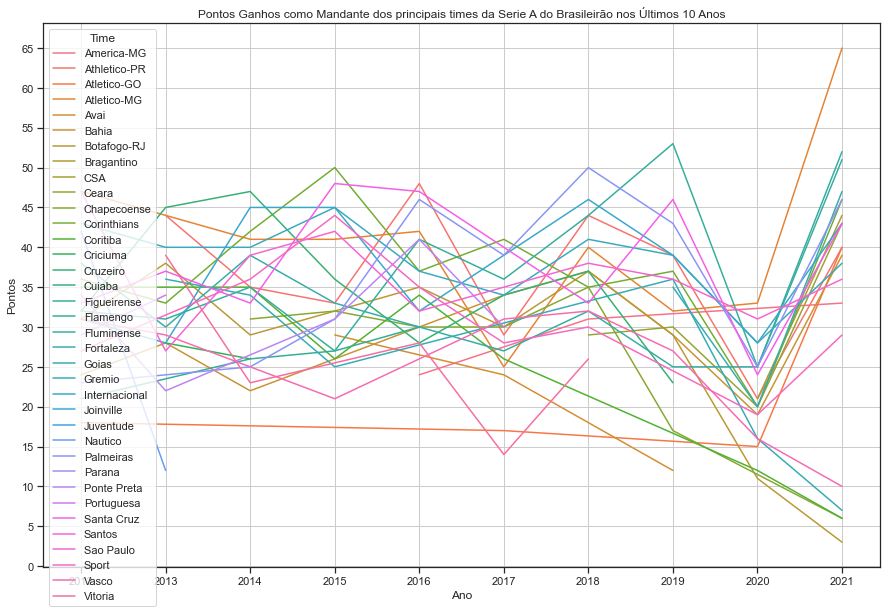

In [25]:
fig, axes = plt.subplots(figsize = (15, 10))

sns.lineplot(x = "ano", y = "ponto_mandante", hue = "Time", data = ano_mandante_plot)
axes.set(xlabel = "Ano", ylabel = "Pontos", title = "Pontos Ganhos como Mandante dos principais times da Serie A do Brasileirão nos Últimos 10 Anos")
plt.xticks(np.arange(min(ano_mandante_plot["ano"]), max(ano_mandante_plot["ano"])+1, 1.0))
plt.yticks(np.arange(0, max(ano_mandante_plot["ponto_mandante"])+5, 5.0))
plt.grid()
plt.show()
fig.savefig("Graficos/Brasileirao.png")


In [26]:
# ano_time_plot["ano"] = pd.to_datetime(ano_time_plot["ano"])
# ano_time_plot.info()

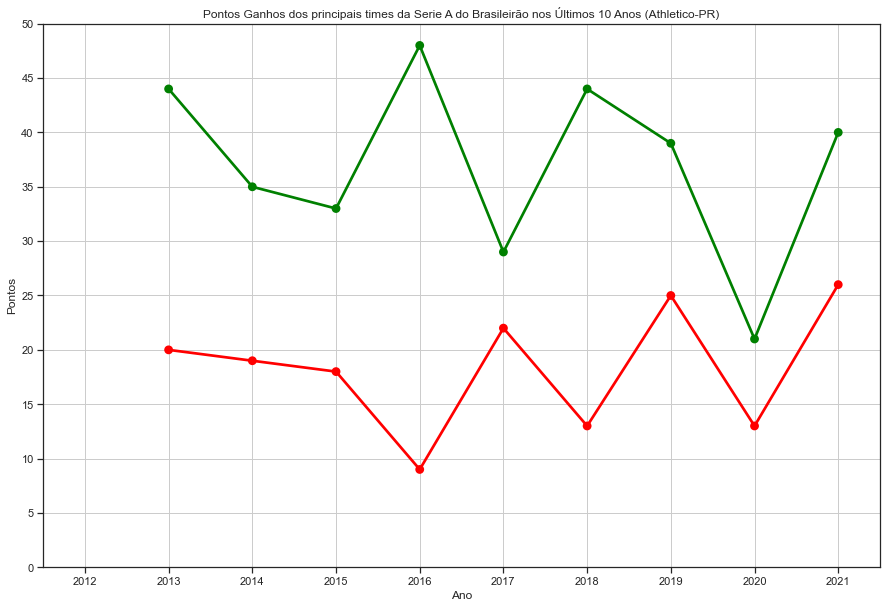

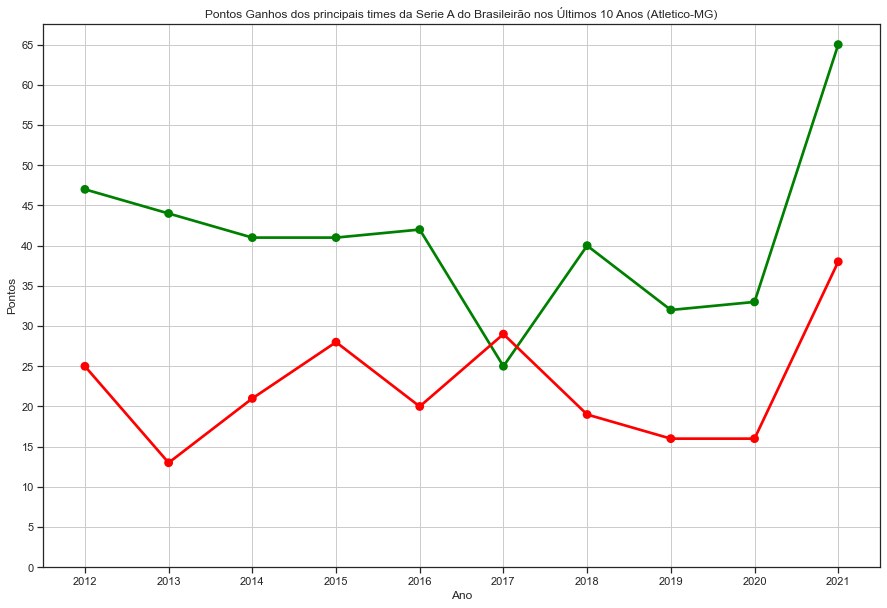

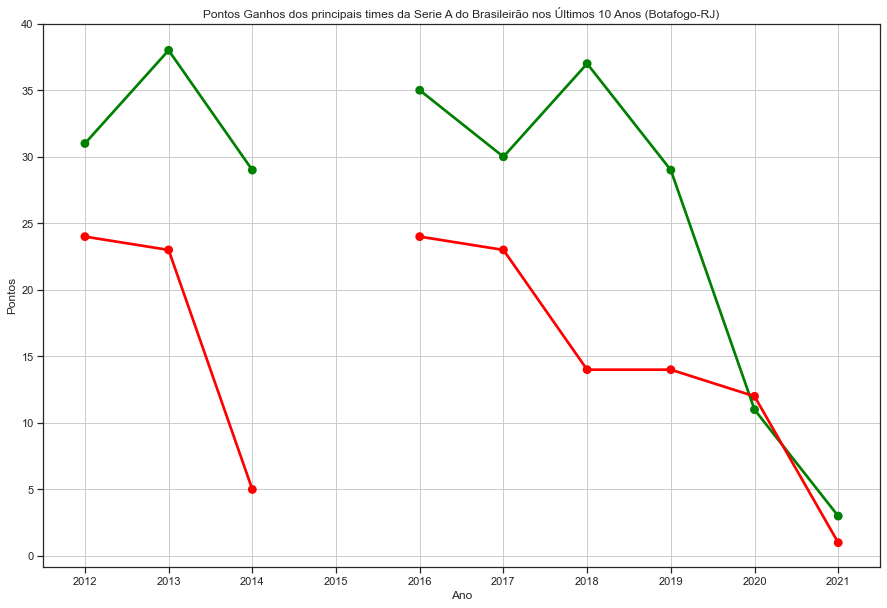

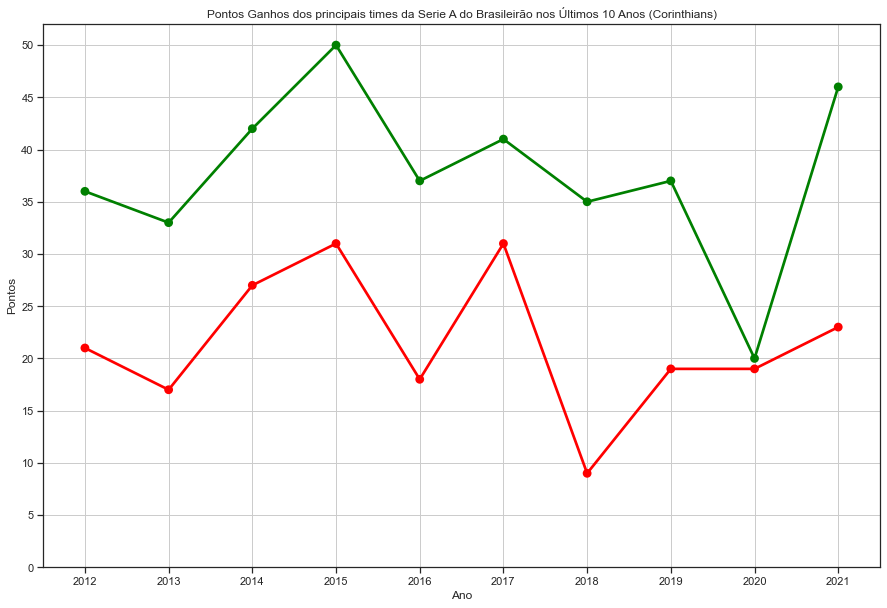

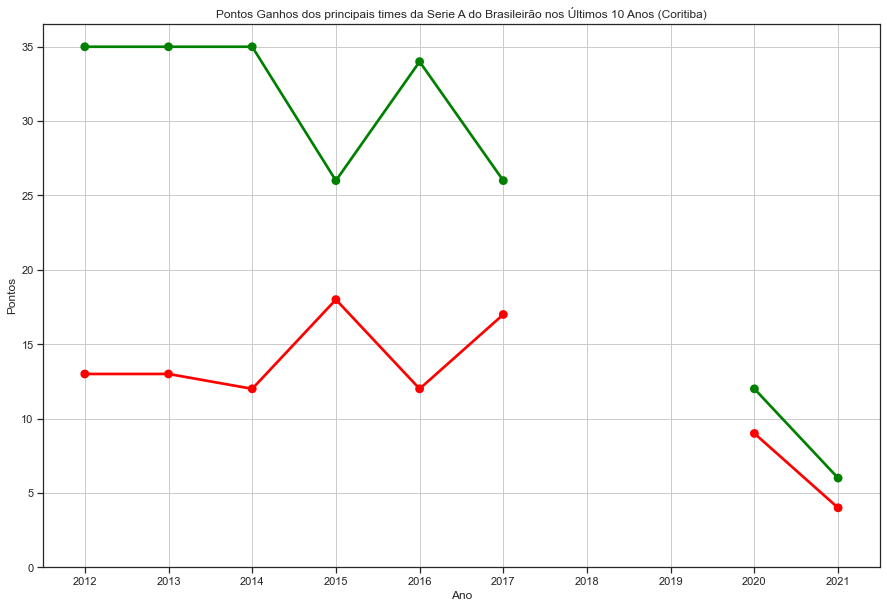

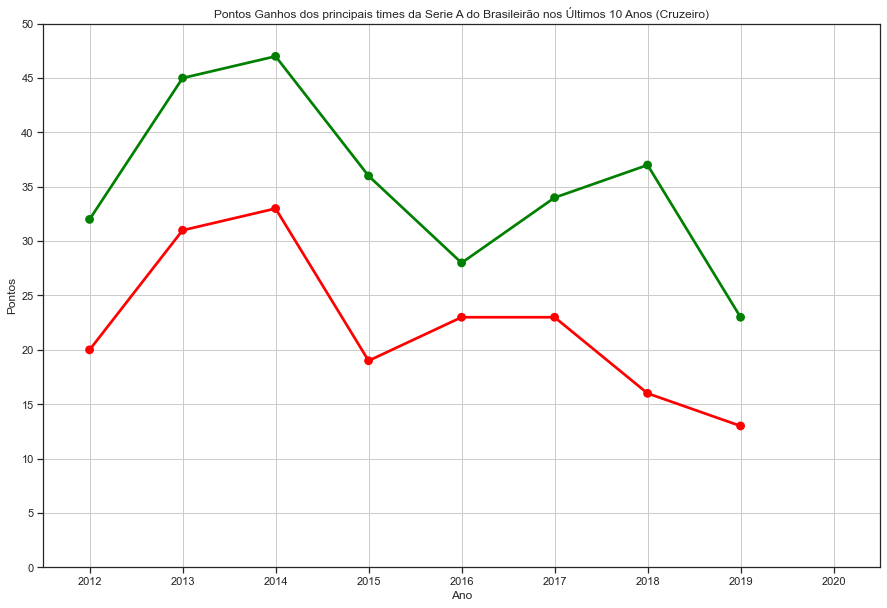

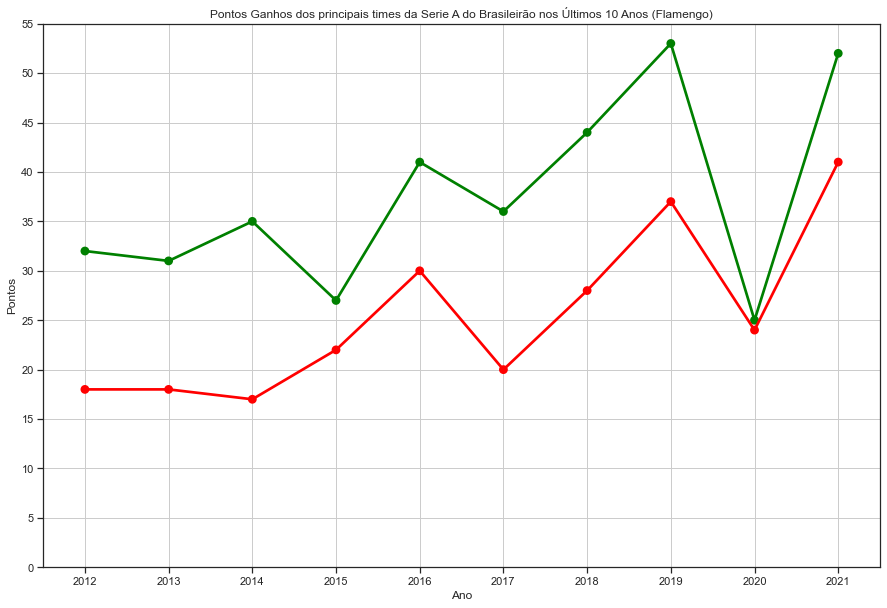

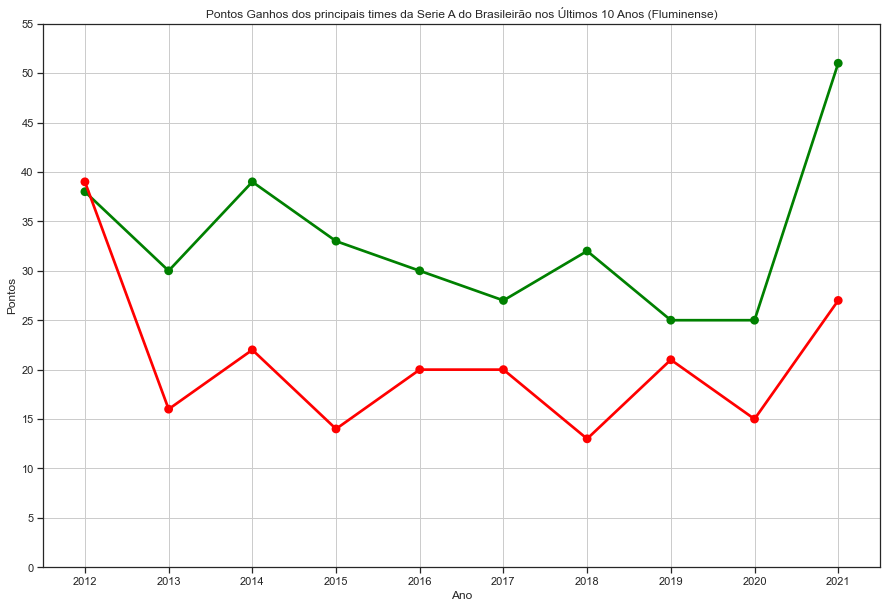

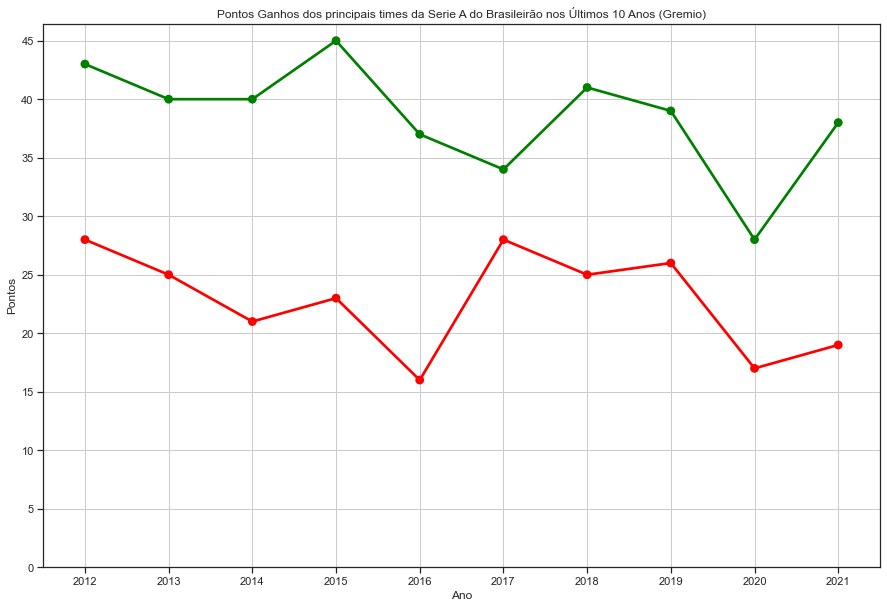

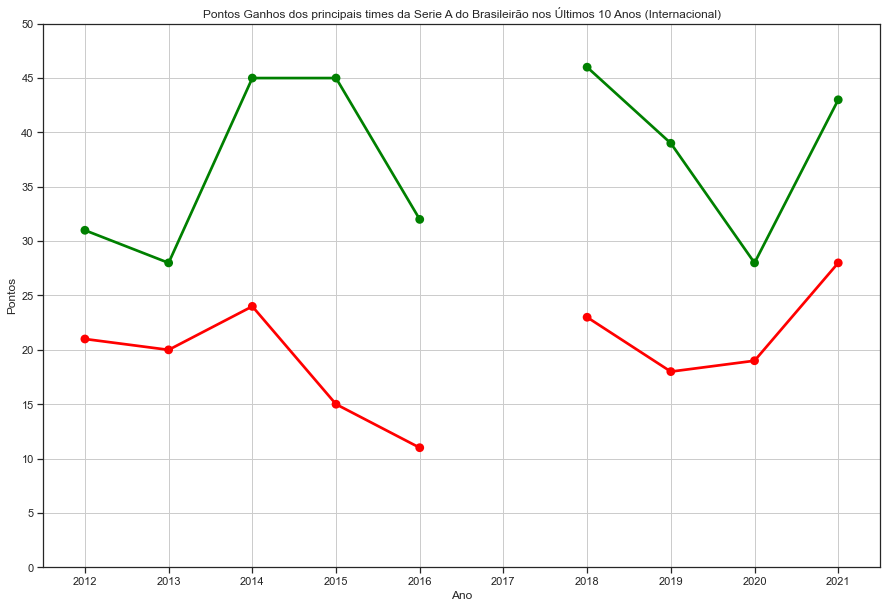

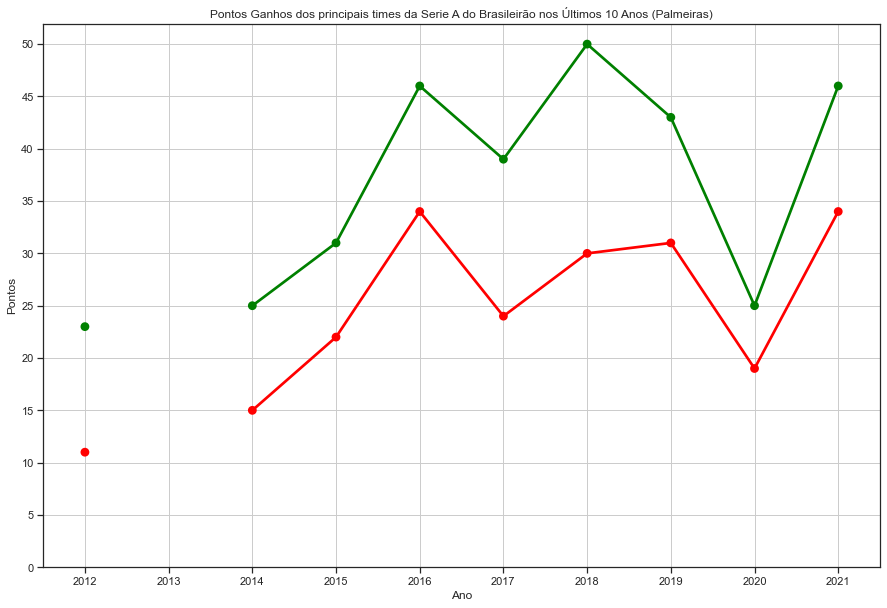

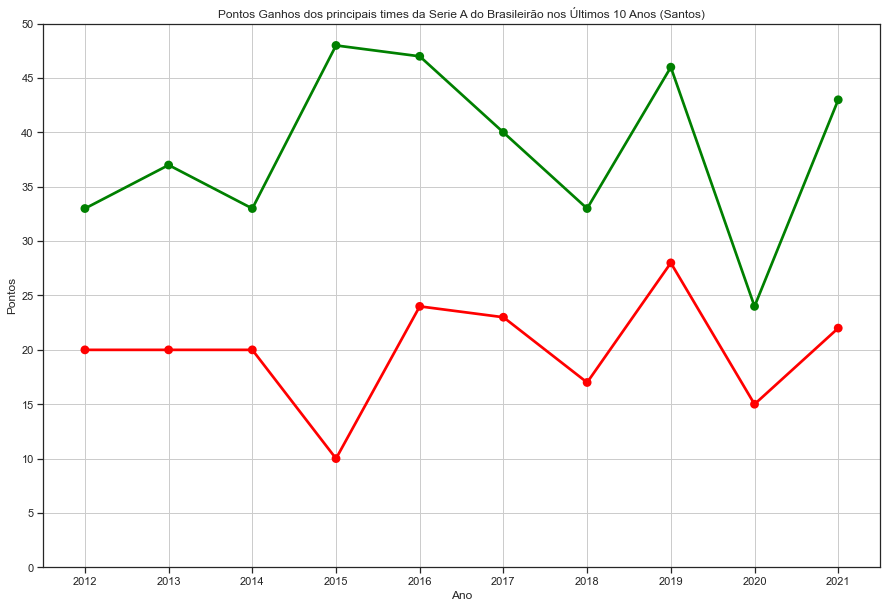

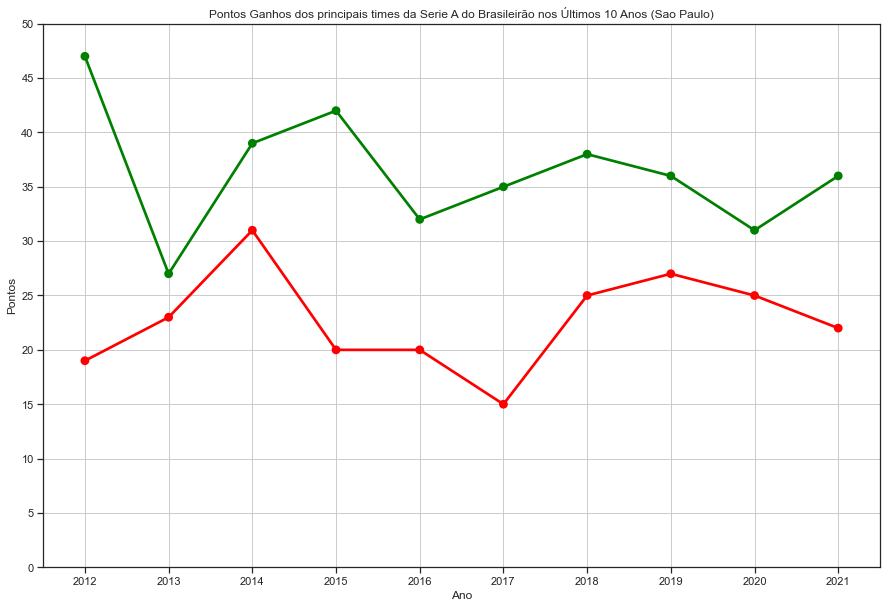

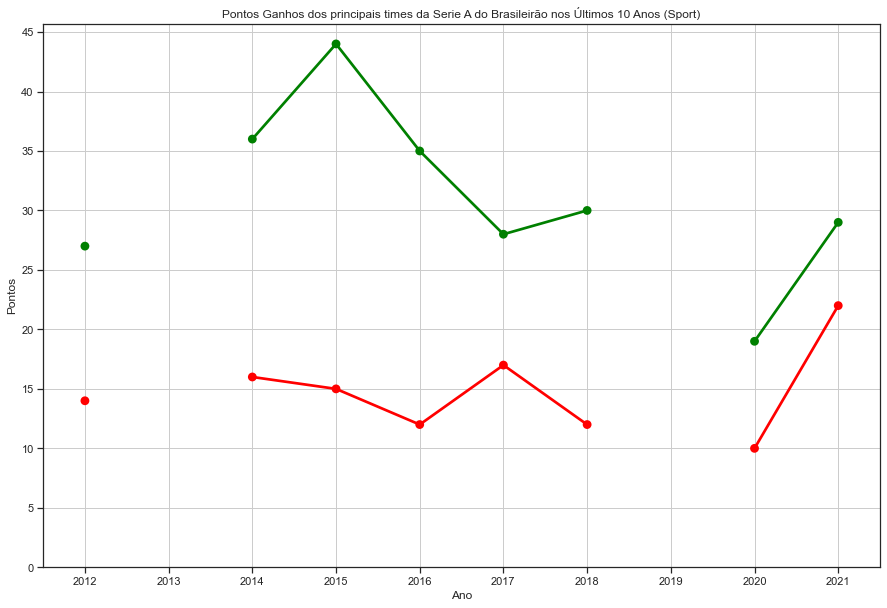

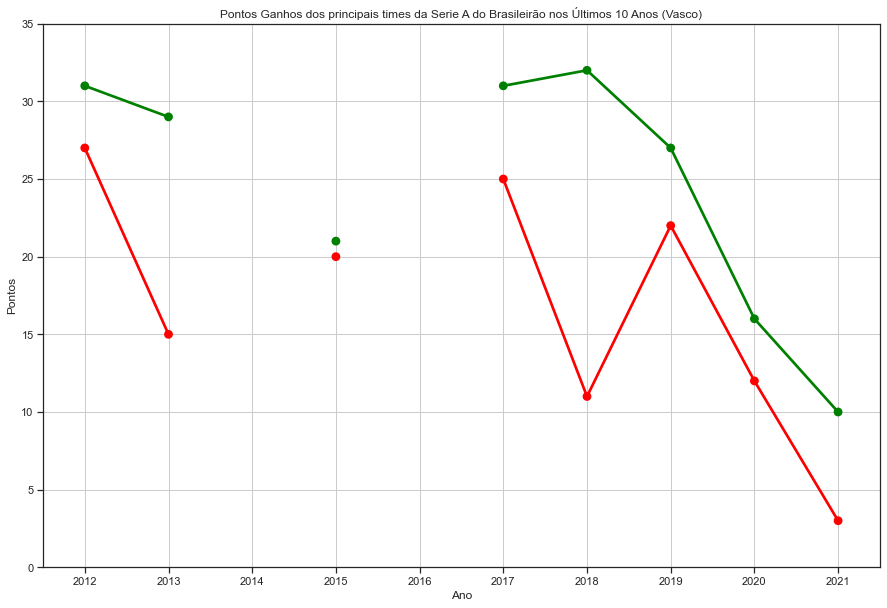

In [27]:
for time in lista_times:
    GraficosPlot.TimesPlot(ano_time_plot, time)

In [28]:
dec_pontos_mandante_df = df_dec.groupby(["mandante"]).ponto_mandante.sum().reset_index().sort_values("ponto_mandante", ascending=False).reset_index(drop=True)
dec_pontos_mandante_df.index += 1
display(dec_pontos_mandante_df)

,mandante,ponto_mandante
1,Atletico-MG,410
2,Gremio,385
3,Santos,384
4,Corinthians,377
5,Flamengo,376
6,Sao Paulo,363
7,Internacional,337
8,Athletico-PR,333
9,Fluminense,330
10,Palmeiras,328


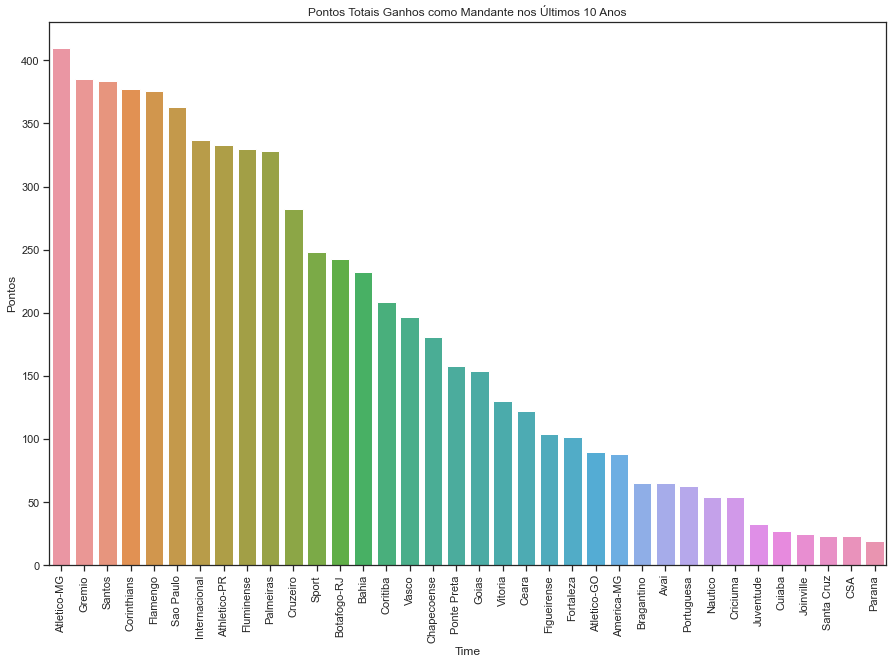

In [29]:
fig, axes = plt.subplots(figsize = (15, 10))
sns.barplot(x = "mandante", y = "ponto_mandante", data = dec_pontos_mandante_df)
axes.set(xlabel = "Time", ylabel = "Pontos", title = "Pontos Totais Ganhos como Mandante nos Últimos 10 Anos")
plt.xticks(rotation = 90)
plt.show()
fig.savefig("Graficos/Pontos_Mandante_2.png")

In [30]:
dec_pontos_visitante_df = df_dec.groupby(["visitante"]).ponto_visitante.sum().reset_index().sort_values("ponto_visitante", ascending=False).reset_index(drop=True)
dec_pontos_visitante_df.index += 1
display(dec_pontos_visitante_df)

,visitante,ponto_visitante
1,Flamengo,255
2,Gremio,228
3,Sao Paulo,227
4,Atletico-MG,225
5,Palmeiras,220
6,Corinthians,215
7,Fluminense,207
8,Santos,199
9,Internacional,179
10,Cruzeiro,178


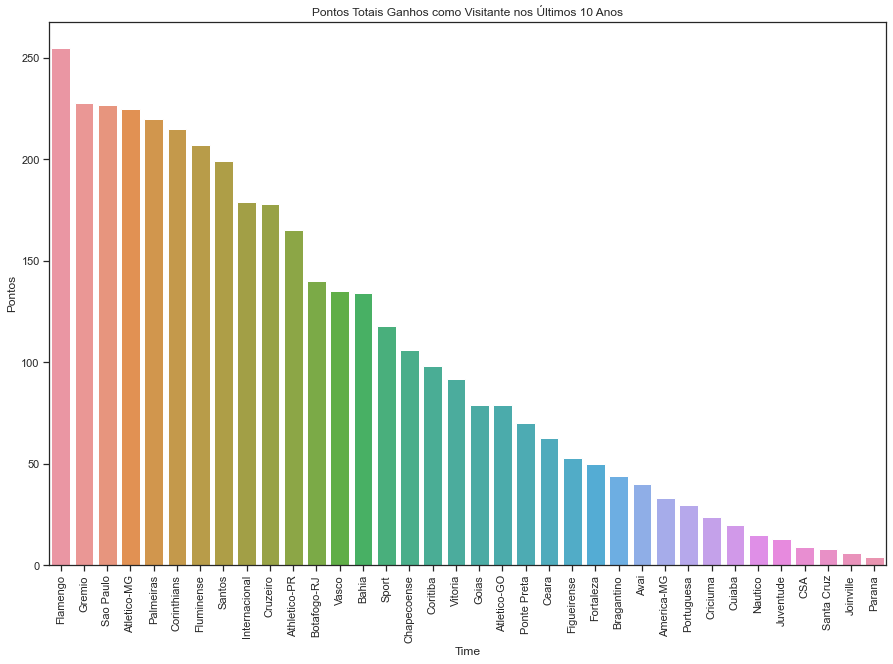

In [31]:
fig, axes = plt.subplots(figsize = (15, 10))
sns.barplot(x = "visitante", y = "ponto_visitante", data = dec_pontos_visitante_df)
axes.set(xlabel = "Time", ylabel = "Pontos", title = "Pontos Totais Ganhos como Visitante nos Últimos 10 Anos")
plt.xticks(rotation = 90)
plt.show()
fig.savefig("Graficos/Pontos_Visitante_2.png")

In [32]:
df_ini = df_br_full[df_br_full["ano"] < 2012]
df_ini.head()

,rodada,data,hora,dia,mandante,visitante,vencedor,mandante_placar,visitante_placar,ponto_mandante,ponto_visitante,ano
ID,,,,,,,,,,,,
1,1,2003-03-29,16:00,Sabado,Guarani,Vasco,Guarani,4,2,3,0,2003
2,1,2003-03-29,16:00,Sabado,Athletico-PR,Gremio,Athletico-PR,2,0,3,0,2003
3,1,2003-03-30,16:00,Domingo,Flamengo,Coritiba,-,1,1,1,1,2003
4,1,2003-03-30,16:00,Domingo,Goias,Paysandu,-,2,2,1,1,2003
5,1,2003-03-30,16:00,Domingo,Internacional,Ponte Preta,-,1,1,1,1,2003


In [33]:
ini_pontos_mandante_df = df_ini.groupby(["mandante"]).ponto_mandante.sum().reset_index().sort_values("ponto_mandante", ascending=False).reset_index(drop=True)
ini_pontos_mandante_df.index += 1
display(ini_pontos_mandante_df)

,mandante,ponto_mandante
1,Sao Paulo,378
2,Internacional,367
3,Santos,358
4,Athletico-PR,355
5,Cruzeiro,349
6,Flamengo,329
7,Fluminense,314
8,Gremio,310
9,Palmeiras,300
10,Corinthians,297


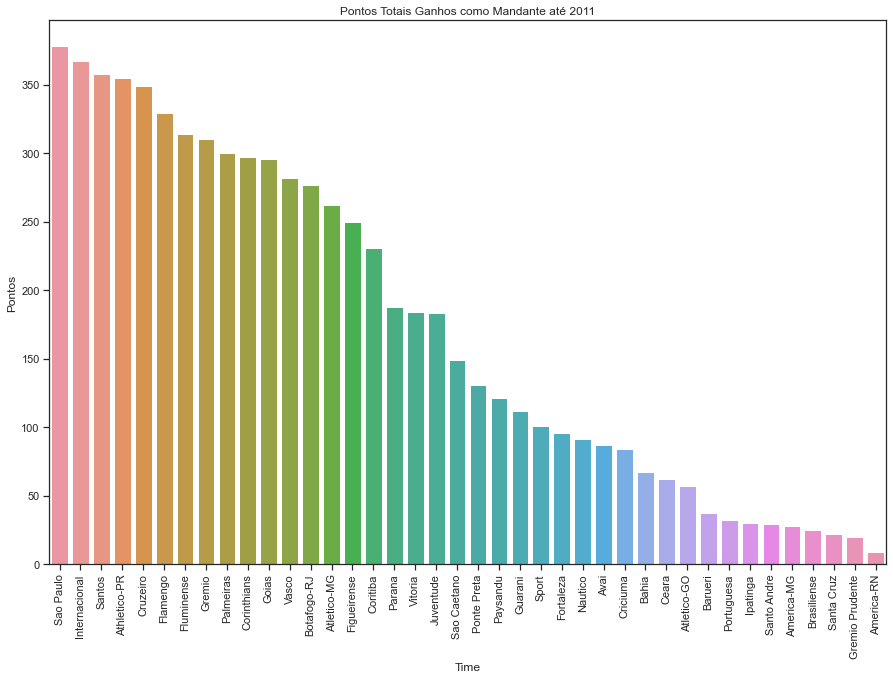

In [34]:
fig, axes = plt.subplots(figsize = (15, 10))
sns.barplot(x = "mandante", y = "ponto_mandante", data = ini_pontos_mandante_df)
axes.set(xlabel = "Time", ylabel = "Pontos", title = "Pontos Totais Ganhos como Mandante até 2011")
plt.xticks(rotation = 90)
plt.show()
fig.savefig("Graficos/Pontos_Mandantes_1.png")

In [35]:
ini_pontos_visitante_df = df_ini.groupby(["visitante"]).ponto_visitante.sum().reset_index().sort_values("ponto_visitante", ascending=False).reset_index(drop=True)
ini_pontos_visitante_df.index += 1
display(ini_pontos_visitante_df)

,visitante,ponto_visitante
1,Sao Paulo,249
2,Cruzeiro,221
3,Internacional,208
4,Santos,206
5,Corinthians,203
6,Fluminense,202
7,Flamengo,195
8,Palmeiras,178
9,Atletico-MG,159
10,Goias,156


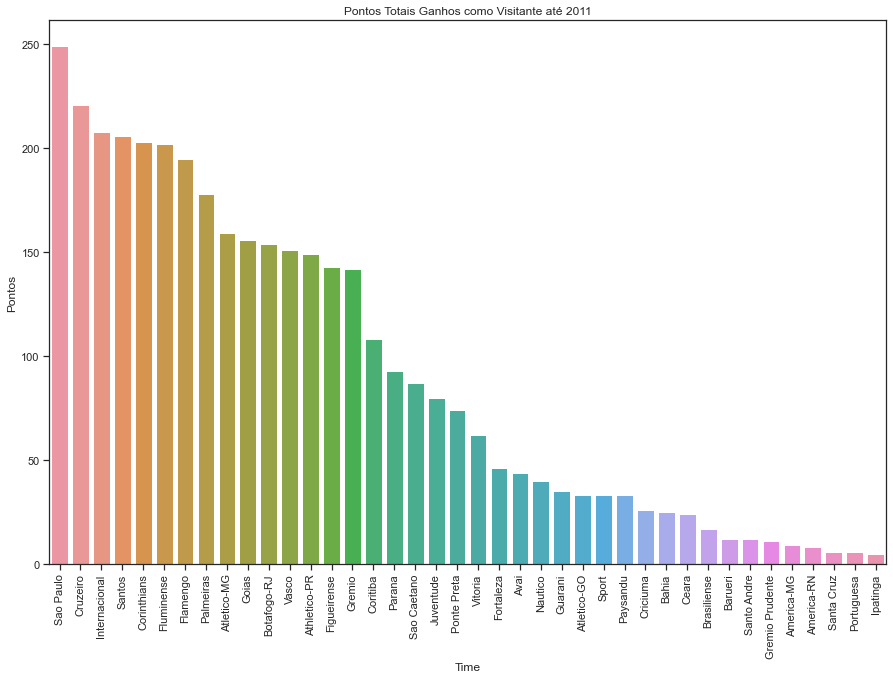

In [36]:
fig, axes = plt.subplots(figsize = (15, 10))
sns.barplot(x = "visitante", y = "ponto_visitante", data = ini_pontos_visitante_df)
axes.set(xlabel = "Time", ylabel = "Pontos", title = "Pontos Totais Ganhos como Visitante até 2011")
plt.xticks(rotation = 90)
plt.show()
fig.savefig("Graficos/Pontos_Visitante_1.png")